### Read the data file where the data is not aggregated by date
### Remove data points where the trap was operating for more than 12 hours
### Make proportion plot for wild salmon as well as hatchery salmon for each species 

In [65]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sys import platform
import matplotlib.gridspec as gridspec

In [2]:
if platform == "linux" or platform == "linux2":
    data_string = "/home/maria/Documents/data/pied_piper/"
    output_string = "/home/maria/Documents/output/pied_piper/"
else:
    data_string = "C:/Users/maria/OneDrive/Documents/data/pied_piper/"
    output_string = "C:/Users/maria/OneDrive/Documents/output/pied_piper/"

In [1]:
df = pd.read_csv(data_string + "combine_2005-2020_dungeness_all.csv", header = 0)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df) 

NameError: name 'pd' is not defined

In [5]:
#first doing this for coho
#calculate doy
#filter on doy
df['Date'] = pd.to_datetime(df['Date'])

df['doy'] = df['Date'].dt.dayofyear

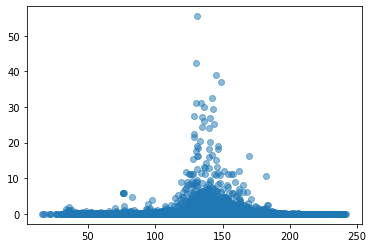

In [9]:
#plotting coho

plt.scatter(df['doy'],df['coho1_wild_perhour'],
            alpha = 0.5)


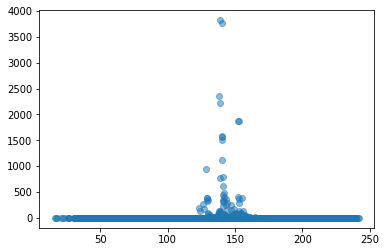

In [10]:
plt.scatter(df['doy'],df['coho1_hatchery_perhour'], alpha = 0.5)

In [23]:
coho = df.loc[(df['doy'] > 120) & (df['doy'] < 160) & (df['In'] < 15)]
coho['midpoint'] = pd.to_datetime(coho['midpoint'])

<ipython-input-23-714779a8ac7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coho['midpoint'] = pd.to_datetime(coho['midpoint'])


(array([394.,  78.,   2.,   1.,   5., 190., 290.,   2.,   7.,  28.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

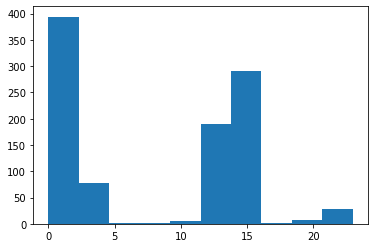

In [24]:
plt.hist(coho['midpoint'].dt.hour)

In [34]:
def categorize_daytime(dt):
    if dt.hour >= 6 and dt.hour < 18:
        return 'Day'
    else:
        return 'Night'


In [35]:
coho['daytime_category'] = coho['midpoint'].apply(categorize_daytime)

<ipython-input-35-64972c751bac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coho['daytime_category'] = coho['midpoint'].apply(categorize_daytime)


In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(coho)

,Unnamed: 0,Down,Up,In,Date,midpoint,temp,flow,chinook0_wild_perhour,chinook1_hatchery_perhour,chinook1_wild_perhour,coho1_hatchery_perhour,coho1_wild_perhour,steelheadsmolt_hatchery_perhour,steelheadsmolt_wild_perhour,chinook0_hatchery_perhour,chinook0_wild_num,chinook0_hatchery_num,chinook1_hatchery_num,chinook1_wild_num,coho1_hatchery_num,coho1_wild_num,steelheadsmolt_hatchery_num,steelheadsmolt_wild_num,pink0_wild_num,chum0_wild_num,pink0_wild_perhour,chum0_wild_perhour,doy,daytime_category
108,108,2005-05-01 07:51:00,2005-05-01 19:51:00,12.000000,2005-05-01,2005-05-01 13:51:00,11.700000,302.0,0.166667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000,0.000000,121,Day
109,109,2005-05-01 19:51:00,2005-05-02 07:28:00,11.616667,2005-05-01,2005-05-02 01:39:30,8.500000,308.0,0.430416,0.000000,0.086083,0.000000,6.111908,4.734577,0.602582,0.000000,5.0,0.0,0.0,1.0,0.0,71.0,55.0,7.0,0.0,4.0,0.000000,0.344333,121,Night
110,110,2005-05-02 07:28:00,2005-05-02 19:45:00,12.283333,2005-05-02,2005-05-02 13:36:30,8.700000,341.0,0.162822,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.000000,0.244233,122,Day
111,111,2005-05-02 19:45:00,2005-05-03 07:22:00,11.616667,2005-05-02,2005-05-03 01:33:30,8.100000,393.0,0.602582,0.086083,0.000000,0.000000,3.959828,0.946915,0.344333,0.000000,7.0,0.0,1.0,0.0,0.0,46.0,11.0,4.0,0.0,16.0,0.000000,1.377331,122,Night
112,112,2005-05-03 07:45:00,2005-05-03 21:30:00,13.750000,2005-05-03,2005-05-03 14:37:30,11.000000,387.0,0.363636,0.000000,0.000000,0.000000,0.800000,0.000000,0.072727,0.000000,5.0,0.0,0.0,0.0,0.0,11.0,0.0,1.0,0.0,2.0,0.000000,0.145455,123,Day
113,113,2005-05-03 21:30:00,2005-05-04 03:10:00,5.666667,2005-05-03,2005-05-04 00:20:00,8.500000,362.0,1.941176,0.000000,0.000000,185.823529,11.823529,2.823529,1.058824,0.000000,11.0,0.0,0.0,0.0,1053.0,67.0,16.0,6.0,0.0,14.0,0.000000,2.470588,123,Night
114,114,2005-05-04 04:02:00,2005-05-04 05:24:00,1.366667,2005-05-04,2005-05-04 04:43:00,8.300000,375.0,0.731707,0.000000,0.000000,140.487805,2.195122,0.731707,1.463415,0.000000,1.0,0.0,0.0,0.0,192.0,3.0,1.0,2.0,0.0,0.0,0.000000,0.000000,124,Night
115,115,2005-05-06 07:30:00,2005-05-06 20:40:00,13.166667,2005-05-06,2005-05-06 14:05:00,11.000000,365.0,0.227848,0.000000,0.000000,0.075949,0.000000,0.000000,0.000000,0.000000,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,126,Day
116,116,2005-05-06 20:40:00,2005-05-06 22:11:00,1.516667,2005-05-06,2005-05-06 21:25:30,9.900000,349.0,0.000000,0.000000,0.000000,267.032967,11.208791,1.318681,0.659341,0.000000,0.0,0.0,0.0,0.0,405.0,17.0,2.0,1.0,0.0,0.0,0.000000,0.000000,126,Night
117,117,2005-05-07 07:30:00,2005-05-07 20:15:00,12.750000,2005-05-07,2005-05-07 13:52:30,9.800000,347.0,0.627451,0.000000,0.000000,0.078431,0.000000,0.000000,0.000000,0.000000,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.000000,0.156863,127,Day


In [38]:
#let's do quick aggregate

coho_agg = coho.groupby(by=['daytime_category']).agg({'In':'sum',
                                                      'coho1_wild_perhour':'sum',
                                                      'coho1_hatchery_perhour':'sum'})
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(coho_agg)

,In,coho1_wild_perhour,coho1_hatchery_perhour
daytime_category,,,
Day,5371.416667,36.004479,4558.025697
Night,5908.586667,1874.379512,30653.003168


In [59]:
grouped_coho = coho.groupby(['Date', 'daytime_category'])['coho1_wild_perhour','coho1_hatchery_perhour'].sum().reset_index()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(grouped_coho)

<ipython-input-59-b6f3e5ba38b1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_coho = coho.groupby(['Date', 'daytime_category'])['coho1_wild_perhour','coho1_hatchery_perhour'].sum().reset_index()


,Date,daytime_category,coho1_wild_perhour,coho1_hatchery_perhour
0,2005-05-01,Day,0.166667,0.000000
1,2005-05-01,Night,6.111908,0.000000
2,2005-05-02,Day,0.000000,0.000000
3,2005-05-02,Night,3.959828,0.000000
4,2005-05-03,Day,0.800000,0.000000
5,2005-05-03,Night,11.823529,185.823529
6,2005-05-04,Night,2.195122,140.487805
7,2005-05-06,Day,0.000000,0.075949
8,2005-05-06,Night,11.208791,267.032967
9,2005-05-07,Day,0.000000,0.078431


In [60]:
total_count = grouped_coho.groupby('Date')['coho1_wild_perhour'].transform('sum')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(total_count)

0       6.278575
1       6.278575
2       3.959828
3       3.959828
4      12.623529
5      12.623529
6       2.195122
7      11.208791
8      11.208791
9       7.428571
10      7.428571
11     11.195618
12     11.195618
13     55.345457
14     55.345457
15     53.182164
16     53.182164
17      9.699429
18      9.699429
19      5.725806
20      5.725806
21      5.710701
22      5.710701
23     12.512599
24     12.512599
25      9.321765
26      9.321765
27      5.954948
28      5.954948
29     13.037867
30     13.037867
31      6.695661
32      6.695661
33      7.257885
34      7.257885
35      7.010417
36      7.010417
37      4.635220
38      4.635220
39      5.428908
40      5.428908
41      7.381890
42      7.381890
43     11.159236
44     11.159236
45     11.012034
46     11.012034
47     13.377828
48     13.377828
49     12.098988
50     12.098988
51      2.948154
52      2.948154
53      2.486772
54      2.486772
55      1.533849
56      1.533849
57      3.291536
58      3.2915

In [61]:
total_count_hatchery = grouped_coho.groupby('Date')['coho1_hatchery_perhour'].transform('sum')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(total_count_hatchery)

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4       185.823529
5       185.823529
6       140.487805
7       267.108916
8       267.108916
9       169.792717
10      169.792717
11      954.043818
12      954.043818
13     1123.905559
14     1123.905559
15      547.467366
16      547.467366
17       51.674462
18       51.674462
19       22.334498
20       22.334498
21       13.933649
22       13.933649
23       13.075979
24       13.075979
25       14.465295
26       14.465295
27       10.108529
28       10.108529
29       10.494343
30       10.494343
31        5.324503
32        5.324503
33        6.430427
34        6.430427
35        2.239583
36        2.239583
37        1.550152
38        1.550152
39        1.786340
40        1.786340
41        2.601399
42        2.601399
43        2.598726
44        2.598726
45        1.482445
46        1.482445
47        1.852941
48        1.852941
49        2.551181
50        2.551181
51        0.245902
52        0.

In [62]:
grouped_coho['coho_proportion'] = grouped_coho['coho1_wild_perhour'] / total_count
grouped_coho['coho_hatchery_proportion'] = grouped_coho['coho1_hatchery_perhour'] / total_count_hatchery
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(grouped_coho)

,Date,daytime_category,coho1_wild_perhour,coho1_hatchery_perhour,coho_proportion,coho_hatchery_proportion
0,2005-05-01,Day,0.166667,0.000000,0.026545,NaN
1,2005-05-01,Night,6.111908,0.000000,0.973455,NaN
2,2005-05-02,Day,0.000000,0.000000,0.000000,NaN
3,2005-05-02,Night,3.959828,0.000000,1.000000,NaN
4,2005-05-03,Day,0.800000,0.000000,0.063374,0.000000
5,2005-05-03,Night,11.823529,185.823529,0.936626,1.000000
6,2005-05-04,Night,2.195122,140.487805,1.000000,1.000000
7,2005-05-06,Day,0.000000,0.075949,0.000000,0.000284
8,2005-05-06,Night,11.208791,267.032967,1.000000,0.999716
9,2005-05-07,Day,0.000000,0.078431,0.000000,0.000462


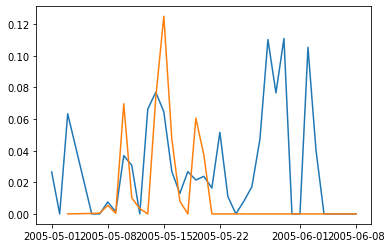

In [63]:
plt.plot(grouped_coho['Date'][grouped_coho['daytime_category'] == "Day"][grouped_coho['Date'].dt.year == 2005],
         grouped_coho['coho_proportion'][grouped_coho['daytime_category'] == "Day"][grouped_coho['Date'].dt.year == 2005])


plt.plot(grouped_coho['Date'][grouped_coho['daytime_category'] == "Day"][grouped_coho['Date'].dt.year == 2005],
         grouped_coho['coho_hatchery_proportion'][grouped_coho['daytime_category'] == "Day"][grouped_coho['Date'].dt.year == 2005])


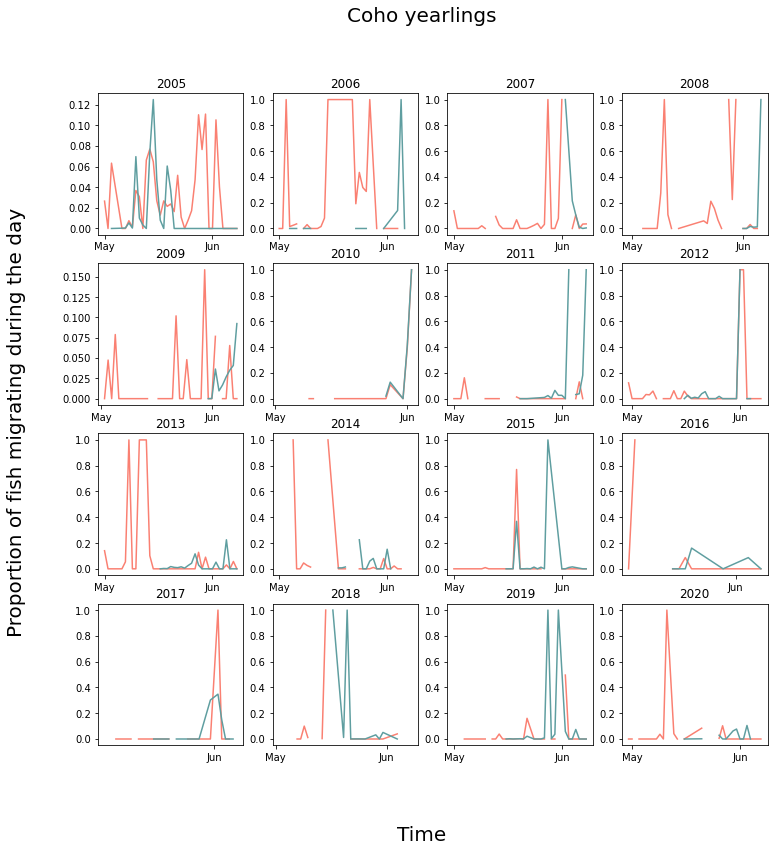

In [75]:

# Define the years range
years = range(2005, 2021)

# Create a 4x4 grid of subplots using GridSpec
fig = plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(4, 4, figure=fig)

# Determine the common x-axis limits
# x_min = grouped_coho['Date'].min()
# x_max = grouped_coho['Date'].max()

# Iterate over each subplot position
for i, year in enumerate(years):
    # Calculate the subplot position
    row = i // 4
    col = i % 4

    # Create the subplot
    ax = fig.add_subplot(gs[row, col])

    # Plot the first line
    ax.plot(grouped_coho['Date'][(grouped_coho['daytime_category'] == "Day") & (grouped_coho['Date'].dt.year == year)],
             grouped_coho['coho_proportion'][(grouped_coho['daytime_category'] == "Day") & (grouped_coho['Date'].dt.year == year)],
           color = "Salmon")

    # Plot the second line
    ax.plot(grouped_coho['Date'][(grouped_coho['daytime_category'] == "Day") & (grouped_coho['Date'].dt.year == year)],
             grouped_coho['coho_hatchery_proportion'][(grouped_coho['daytime_category'] == "Day") & (grouped_coho['Date'].dt.year == year)],
           color = "cadetblue")

    # Set subplot title
    ax.set_title(str(year))
    locator = mdates.MonthLocator()  # every month
    # Specify the format - %b gives us Jan, Feb...
    fmt = mdates.DateFormatter('%b')


    
    X = plt.gca().xaxis
    X.set_major_locator(locator)
    # Specify formatter
    X.set_major_formatter(fmt)
    
    # Set the x-axis limits
#     ax.set_xlim(x_min, x_max)

# Adjust the spacing between subplots
# fig.tight_layout()
fig.supxlabel("Time", fontsize=20)
fig.supylabel("Proportion of fish migrating during the day", fontsize=20)
plt.suptitle("Coho yearlings", fontsize=20)
# Display the plot

plt.savefig(output_string  + 'coho_day_time.jpeg',
                dpi=500)
plt.show()